
Explained variance ratio per component:
PC1: 0.2774, cumulative: 0.2774
PC2: 0.1468, cumulative: 0.4242
PC3: 0.1142, cumulative: 0.5384
PC4: 0.1002, cumulative: 0.6386
PC5: 0.0856, cumulative: 0.7242
PC6: 0.0617, cumulative: 0.7858
PC7: 0.0411, cumulative: 0.8269
PC8: 0.0310, cumulative: 0.8579
PC9: 0.0300, cumulative: 0.8879
PC10: 0.0263, cumulative: 0.9142
PC11: 0.0234, cumulative: 0.9377
PC12: 0.0176, cumulative: 0.9553
PC13: 0.0163, cumulative: 0.9716
PC14: 0.0141, cumulative: 0.9857
PC15: 0.0057, cumulative: 0.9914
PC16: 0.0044, cumulative: 0.9958
PC17: 0.0027, cumulative: 0.9985
PC18: 0.0015, cumulative: 1.0000


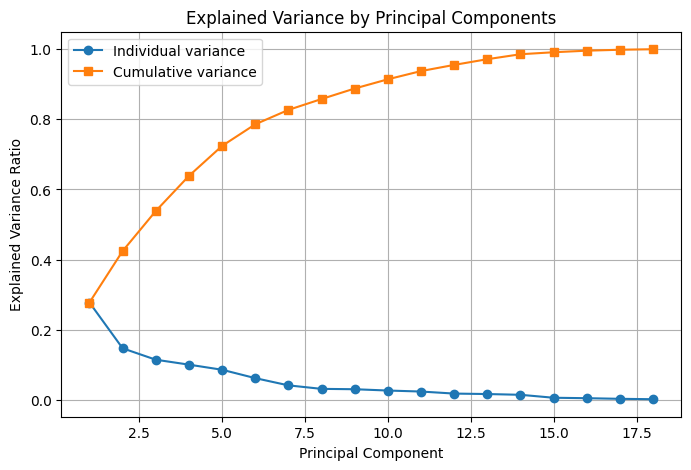

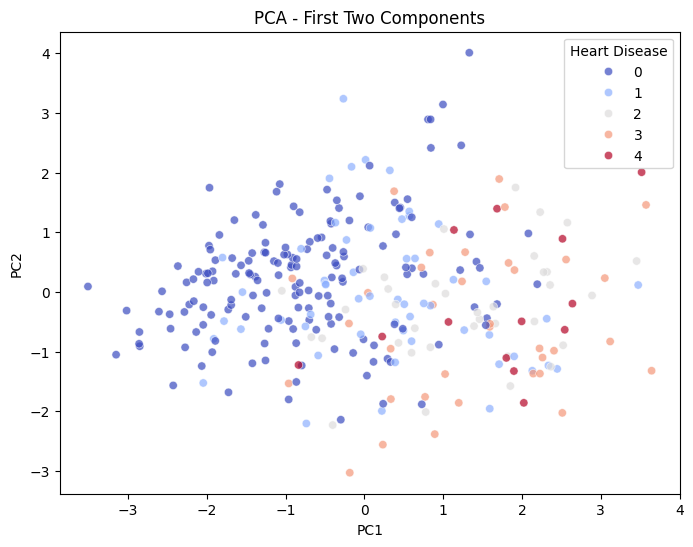

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load cleaned dataset
df = pd.read_csv("../data/cleaned_heart.csv")

# Separate features (X) and target (y)
X = df.drop("num", axis=1)
y = df["num"]

# 2. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Convert PCA result into DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X.shape[1])])
pca_df["num"] = y

# 3. Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

print("\nExplained variance ratio per component:")
for i, var in enumerate(explained_var, 1):
    print(f"PC{i}: {var:.4f}, cumulative: {cumulative_var[i-1]:.4f}")

# 4a. Scree plot (variance per PC)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label="Individual variance")
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='s', label="Cumulative variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.legend()
plt.grid(True)
plt.show()

# 4b. Scatter plot (first 2 PCs)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["num"], palette="coolwarm", alpha=0.7)
plt.title("PCA - First Two Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Heart Disease")
plt.show()

# 5. Save PCA dataset
pca_df.to_csv("../data/pca_heart.csv", index=False)

